In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
ir= pd.read_csv("C:\\Users\\dhima\\anaconda3\\6th Week\\Iris.csv")
ir1=ir.copy()
ir1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
ir1.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [3]:
y_true=ir1['Species']
y_true


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

# Ques 1. Apply PCA and select first two directions to convert the data in to 2D. (Exclude the attribute “Species” for PCA)

In [4]:
ir2=ir1.iloc[0:,1:5]
ir2

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
from sklearn.decomposition import PCA

pca = PCA(2)

df = pca.fit_transform(ir2)
pca.n_components_
df1=df.copy()
df.shape

(150, 2)

# 2. Apply Agglomerative clustering with 3 clusters on the data. Plot the points in these clusters using different colors. Compare with the clustering obtained by K-means approach. (Use sklearn.cluster.AgglomerativeClustering)

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

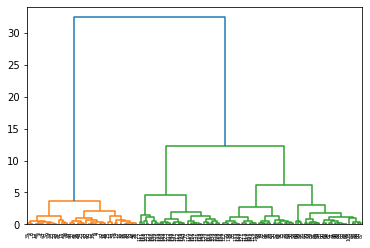

In [7]:
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

In [8]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit_predict(df)
labels = model.labels_

labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

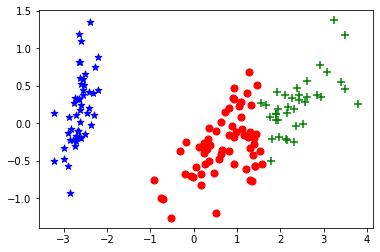

In [9]:
plt.scatter(df[labels==0, 0], df[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(df[labels==1, 0], df[labels==1, 1], s=50, marker='*', color='blue')
plt.scatter(df[labels==2, 0], df[labels==2, 1], s=50, marker='+', color='green')

plt.show()

# 3. i) Apply DBSCAN clustering with default parameters and compare the results.
# ii) Vary the parameter eps (maximum distance between two samples to be considered) to 0.05, 0.5 and 0.95 and observe the results. Vary min_samples (The number of samples in neighbourhood) to 1,5,10 and 20 and observe the resuts. (Use sklearn.cluster.DBSCAN )

In [10]:
from sklearn.cluster import DBSCAN
def dbscan(X, eps, min_samples):
    #ss = StandardScaler()
    #X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples,metric='euclidean')
    db.fit(X)
    y_pred3 = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred3, cmap='Paired')
    plt.title("DBSCAN")

# eps=0.05

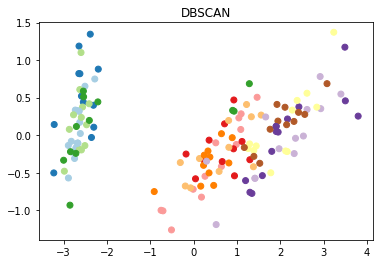

In [11]:
dbscan(df1, 0.05, 1)

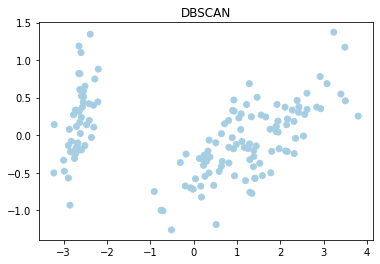

In [12]:
dbscan(df1, 0.05, 5)

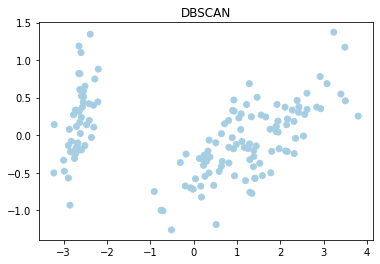

In [13]:
dbscan(df1, 0.05, 10)

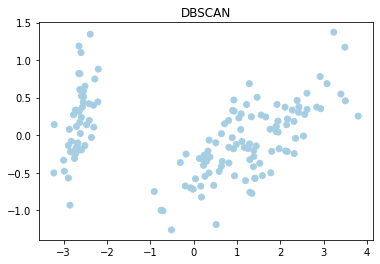

In [14]:
dbscan(df1, 0.05, 20)

# eps=0.5

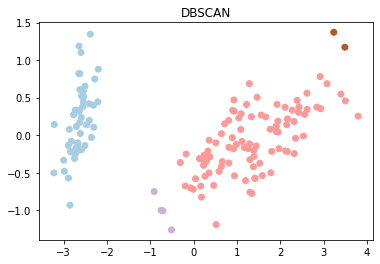

In [15]:
dbscan(df1, 0.5, 1)

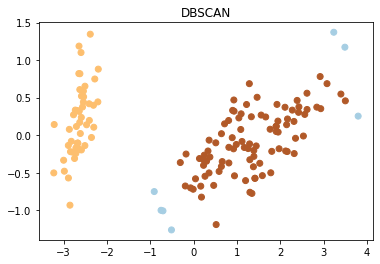

In [16]:
dbscan(df1, 0.5, 5)

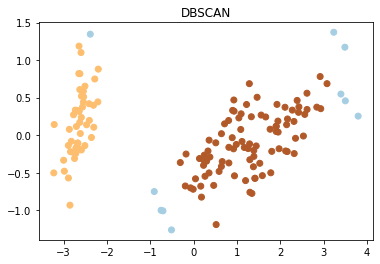

In [17]:
dbscan(df1, 0.5, 10)

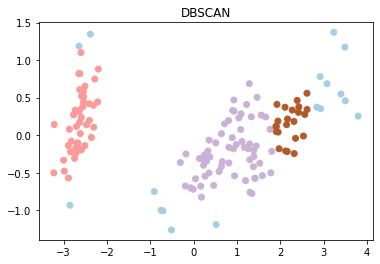

In [18]:
dbscan(df1, 0.5, 20)

# eps=0.95

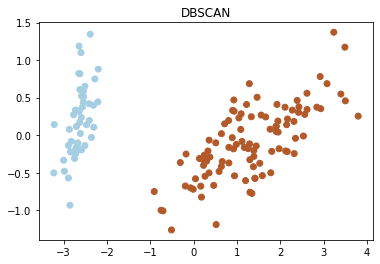

In [19]:
dbscan(df1, 0.95, 1)

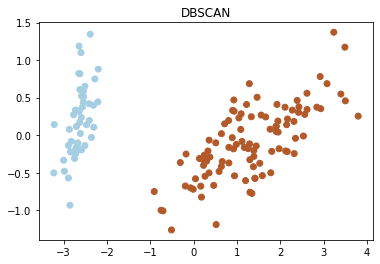

In [20]:
dbscan(df1, 0.95, 5)

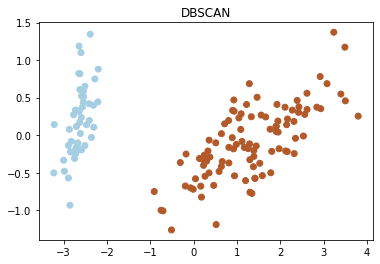

In [21]:
dbscan(df1, 0.95, 10)

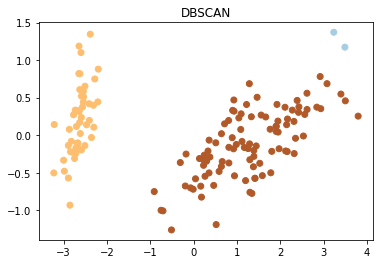

In [22]:
dbscan(df1, 0.95, 20)

# 4. Obtain and compare the purity score for all the clustering methods. Sample code snippet is given below.

In [23]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [24]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
label_3=model.fit_predict(df)
labels = model.labels_

purity_score(y_true,label_3)

0.9

In [25]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.05, min_samples=10,metric='euclidean')
db.fit(df1)
y_pred3 = db.fit_predict(df1)

purity_score(y_true,y_pred3)

0.3333333333333333

In [26]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=10,metric='euclidean')
db.fit(df1)
y_pred3 = db.fit_predict(df1)

purity_score(y_true,y_pred3)

0.6666666666666666

In [27]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.95, min_samples=10,metric='euclidean')
db.fit(df1)
y_pred3 = db.fit_predict(df1)

purity_score(y_true,y_pred3)

0.6666666666666666

In [28]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=1,metric='euclidean')
db.fit(df1)
y_pred3 = db.fit_predict(df1)

purity_score(y_true,y_pred3)

0.6933333333333334

In [29]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5,metric='euclidean')
db.fit(df1)
y_pred3 = db.fit_predict(df1)

purity_score(y_true,y_pred3)

0.6733333333333333

In [30]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=10,metric='euclidean')
db.fit(df1)
y_pred3 = db.fit_predict(df1)

purity_score(y_true,y_pred3)

0.6666666666666666

In [31]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=20,metric='euclidean')
db.fit(df1)
y_pred3 = db.fit_predict(df1)

purity_score(y_true,y_pred3)

0.84